##### Set Up

In [1]:
## imports and dependencies

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.ensemble import RandomForestRegressor

# data split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error


##### Data

In [2]:
# data
df = pd.read_csv("tar_enc_dataset.csv")

In [3]:
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9)  
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [8]:
# Random Forest Scaled
rf_scaled = RandomForestRegressor()
rf_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = rf_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.38258373002758245


In [9]:
# Random Forest PCA
rf_pca = RandomForestRegressor()
rf_pca.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.5352853246949059


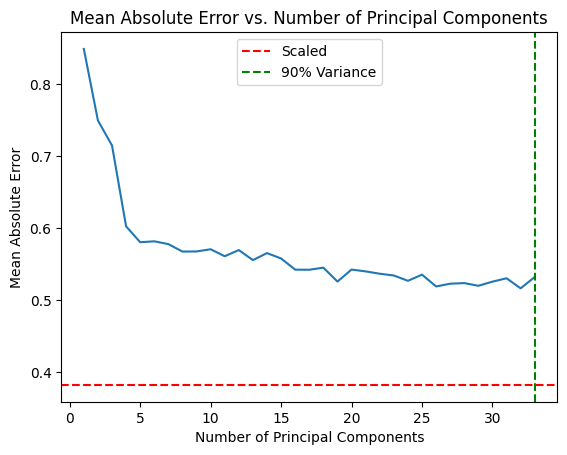

In [10]:
# iterate through numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    rf = RandomForestRegressor()
    rf.fit(x_train_pca, y_train)
    y_pred = rf.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [11]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(32, 0.5167163353398132)

In [12]:
num_components

range(1, 34)

In [13]:
mae_values

[0.8492670568533853,
 0.7499133229725642,
 0.7151561302525243,
 0.6028485044173898,
 0.5807874819288491,
 0.5820347203873408,
 0.5781773208484727,
 0.5677874739175031,
 0.5679706856592731,
 0.571039105790632,
 0.5613426745343789,
 0.5698905015799353,
 0.5559326464089344,
 0.56568050313404,
 0.5581924531097129,
 0.5426861231377705,
 0.5425544282824418,
 0.5454487667117631,
 0.5261411516694163,
 0.542796346832047,
 0.5402738863569954,
 0.537033536585513,
 0.5345515487236222,
 0.5272074402954223,
 0.5357477382418957,
 0.5193742491911318,
 0.5231743982546311,
 0.5240062940166546,
 0.5202922841891964,
 0.52602445670327,
 0.5307403320146824,
 0.5167163353398132,
 0.5325043163159556]